In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as pp
import model as md




# import splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
prop_df = pd.read_csv('nyc-rolling-sales.csv')
prop_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
prop_df.shape

(84548, 22)

In [4]:
# to see all column heads
pd.set_option('display.max_columns', None)


In [5]:
prop_df.NEIGHBORHOOD.unique().shape

(254,)

In [6]:
prop_df.BOROUGH.unique().shape

(5,)

In [7]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

# Acquire takeaways
- There are unnecessary columns like Unnamed: 0, Block, Lot, Ease-Ment, Address, Apartment, Number which is unnecessary for prediction for the sale price of the homes. They play roles in identification for legal and other purposes.

- Two columns serve the same purpose like Building Class at Present and Building Class at time of Sale, so it is better to get rid of them.

- Sale Price, Land Square Feet, Gross Square Feet are attributes of interest, as they impact the sale price. But they are in data type object. We will take necessary steps in prepare phase to convert it into float.
- Year Built influences the sale price so, we will introduce new attribute age = 2022- built year to analyze, its affect on sale price
- We will keep the sale date in DataFrame as the sale price is dependent on sale date.

# Prepare

###### Steps Performed for Cleaning Data
- We will delete these columns from DataFrames as they have low influence in sale price of the property Unnamed: 0, BUILDING CLASS CATEGORY, BLOCK, LOT, EASE-MENT, ADDRESS, APARTMENT NUMBER, BUILDING CLASS AT PRESENT 
- Replacing white space in column head with '_' as it will be easy to deal with column head later on.
- Converting column head to lower string
- getting rid of unneccessary while space in column head
- Replacing '-' value with empty in sale price
- Replacing '-' value with empty in land square feet
- Replacing '-' value with empty in gross square feet
- Replacing one or more space characeters  with Null
- Dropping NAN from DataFrame
- Conveting sale price to float data type
- Conveting land square feet to float data type
- Conveting gross square feet to float data type
- Removing record for which sale price is equal to or less than or equal to 1000
- age column created by subtracting 2022 - year_built
- Dropping year_built
- Removing outliers
- Spliting Data

In [8]:
prop_df = pp.prepare_prop(prop_df)

In [9]:
prop_df

,borough,neighborhood,tax_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
4172,1,GREENWICH VILLAGE-WEST,1,10014,1,0,1,384.0,1152.0,1,A5,1375000.0,2016-10-07 00:00:00,121
4173,1,GREENWICH VILLAGE-WEST,1,10014,1,0,1,384.0,1152.0,1,A5,1375000.0,2016-10-07 00:00:00,121
4811,1,HARLEM-CENTRAL,1,10030,1,0,1,2000.0,3360.0,1,A4,1000000.0,2016-09-29 00:00:00,123
4824,1,HARLEM-CENTRAL,1,10027,2,0,2,1799.0,3600.0,1,B1,1310000.0,2016-11-16 00:00:00,123
4827,1,HARLEM-CENTRAL,1,10030,2,0,2,1749.0,2625.0,1,B3,850000.0,2017-03-27 00:00:00,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,5,WOODROW,1,10309,2,0,2,4350.0,2840.0,1,B2,625000.0,2016-10-18 00:00:00,26
84540,5,WOODROW,1,10309,2,0,2,3325.0,1300.0,1,B2,509000.0,2016-10-31 00:00:00,27
84543,5,WOODROW,1,10309,2,0,2,2400.0,2575.0,1,B9,450000.0,2016-11-28 00:00:00,24
84544,5,WOODROW,1,10309,2,0,2,2498.0,2377.0,1,B9,550000.0,2017-04-21 00:00:00,24


###### Split Data

In [10]:
train, validate, test = pp.split_prop_df(prop_df)

In [11]:
train.shape

(12645, 14)

In [12]:
validate.shape

(5420, 14)

In [13]:
test.shape

(4517, 14)

### Prepare Takeaways:
- Sale price has non-numerical entries
- Sale price has values of \$ 0 and \$ 10 for sale of properties with in family members for sake of transformation of titles. We will drop them as well, as it will create possible prediction problem.
- Since we are dealing with property of New York, sale of any properties below 1,000 sounds like it's not real sale between two parties that we are interested in.
- Some columns are categorical and some are continuous, so I will try to do classification model prediction as well if time favors me.

# Exploration:

In [14]:
def get_histogram(prop_df):
    
    plt.figure(figsize=(16, 16))

    # List of columns
    cols = ['total_units', 'land_square_feet', 'gross_square_feet', 'sale_price', 'age']

    for i, col in enumerate(cols):
    
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
    
        # Create subplot.
        plt.subplot(1, 5, plot_number)
    
        # Title with column name.
        plt.title(col)
    
        # Display histogram for column.
        prop_df[col].hist(bins= 100, edgecolor='black')
    

    
        # Hide gridlines.
        plt.grid(False)
        
        
        plt.figure(figsize=(16,4))

      
                
        
def get_boxplot(prop_df):
    plt.figure(figsize=(16, 7))
    # List of columns
    cols = ['total_units', 'land_square_feet', 'gross_square_feet', 'sale_price', 'age']
    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=prop_df[cols])
    

        # Hide gridlines.
        plt.grid(False)

    plt.show()

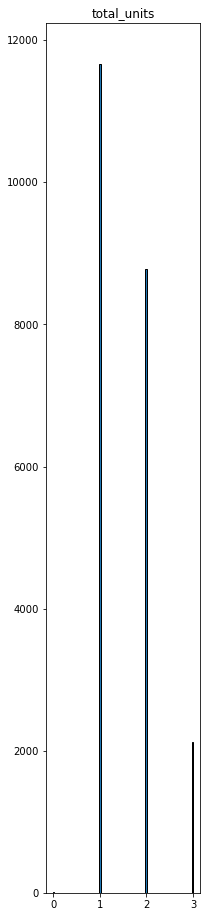

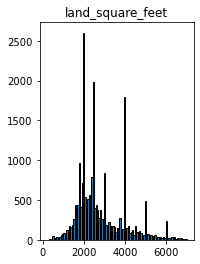

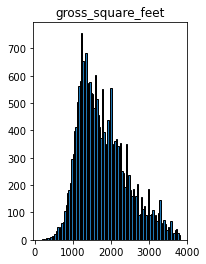

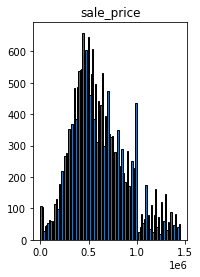

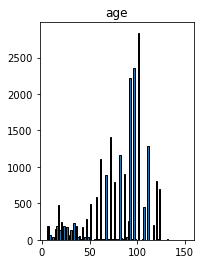

<Figure size 1152x288 with 0 Axes>

In [15]:
get_histogram(prop_df)

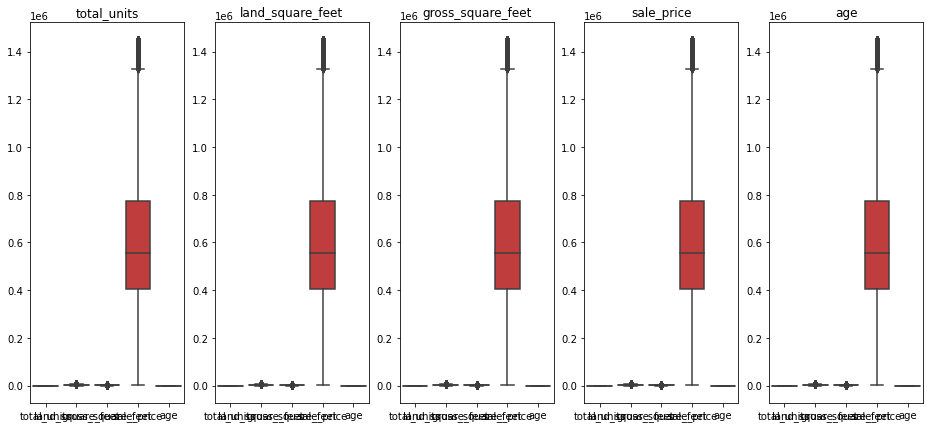

In [16]:
get_boxplot(prop_df)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12645 entries, 38029 to 70110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         12645 non-null  int64  
 1   neighborhood                    12645 non-null  object 
 2   tax_class_at_present            12645 non-null  object 
 3   zip_code                        12645 non-null  int64  
 4   residential_units               12645 non-null  int64  
 5   commercial_units                12645 non-null  int64  
 6   total_units                     12645 non-null  int64  
 7   land_square_feet                12645 non-null  float64
 8   gross_square_feet               12645 non-null  float64
 9   tax_class_at_time_of_sale       12645 non-null  int64  
 10  building_class_at_time_of_sale  12645 non-null  object 
 11  sale_price                      12645 non-null  float64
 12  sale_date                   

# Exploration:

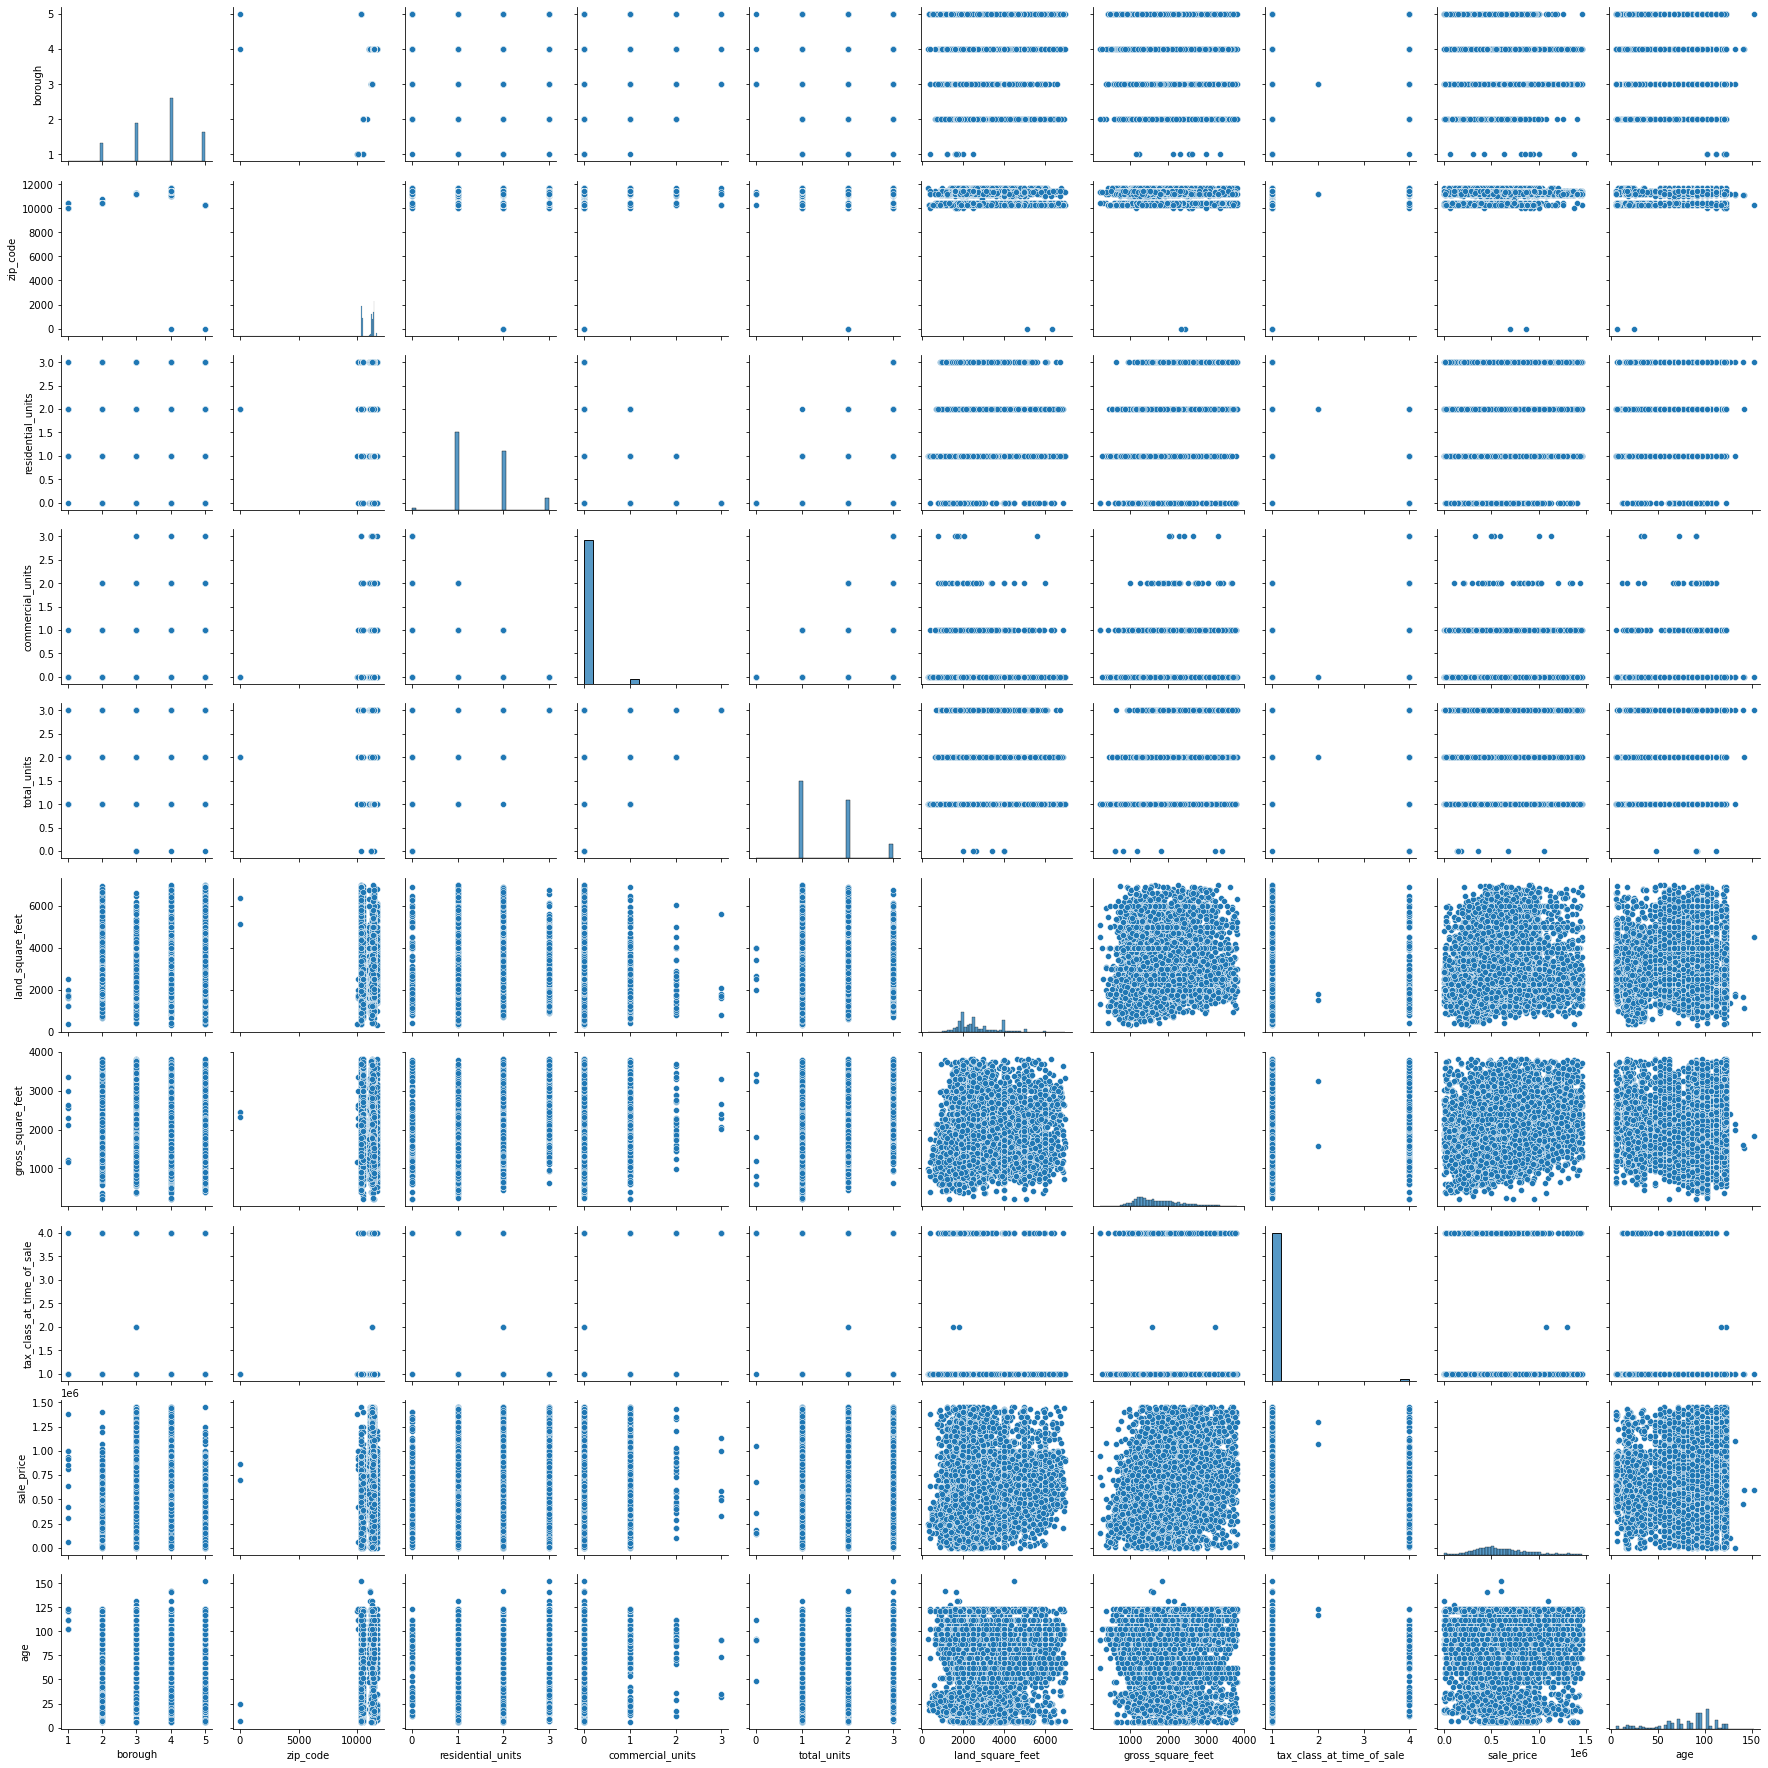

In [18]:
sns.pairplot(train)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12645 entries, 38029 to 70110
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         12645 non-null  int64  
 1   neighborhood                    12645 non-null  object 
 2   tax_class_at_present            12645 non-null  object 
 3   zip_code                        12645 non-null  int64  
 4   residential_units               12645 non-null  int64  
 5   commercial_units                12645 non-null  int64  
 6   total_units                     12645 non-null  int64  
 7   land_square_feet                12645 non-null  float64
 8   gross_square_feet               12645 non-null  float64
 9   tax_class_at_time_of_sale       12645 non-null  int64  
 10  building_class_at_time_of_sale  12645 non-null  object 
 11  sale_price                      12645 non-null  float64
 12  sale_date                   

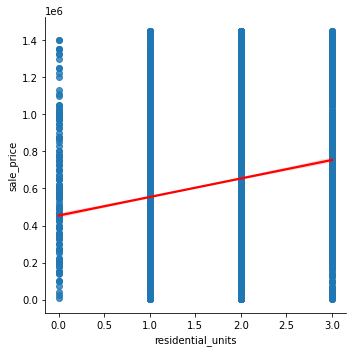

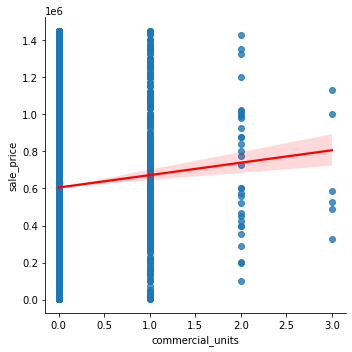

In [84]:
# plotting lmplot for the train data set

col_list = ['residential_units', 'commercial_units']
for item in col_list:
    
    sns.lmplot(x = item, y = 'sale_price', data = train, line_kws = {'color' : 'red'})
    pd.set_option('display.max_rows', 500)
    pd.options.display.max_rows
    plt.show()

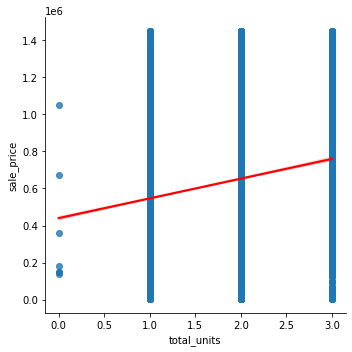

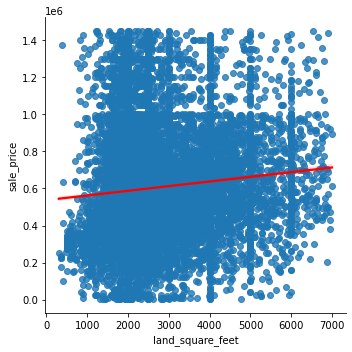

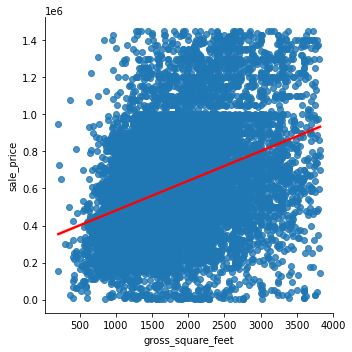

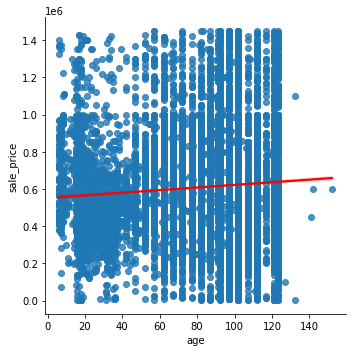

In [85]:
col_list = ['total_units', 'land_square_feet', 'gross_square_feet', 'age']
for item in col_list:
    
    sns.lmplot(x = item, y = 'sale_price', data = train, line_kws = {'color' : 'red'})
    pd.set_option('display.max_rows', 500)
    pd.options.display.max_rows
    plt.show()

- Based on this lmplot, we can say that sale price is dependents on residential_units, commercial_units, total_units, land_square_feet, and gross_square_feet. But its relationship with age is not clear, so we will use statistical tests to check it out.

In [21]:
# Creating the correlation matrix  for all atributes of properties in train dataset
prop_df_corr = train.corr()
prop_df_corr

,borough,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,sale_price,age
borough,1.000000,-0.120687,-0.283889,-0.049438,-0.299721,0.268788,-0.253288,-0.024141,-0.078148,-0.330793
zip_code,-0.120687,1.000000,0.063822,0.027091,0.072843,-0.078803,-0.005557,-0.000306,0.243589,0.330824
residential_units,-0.283889,0.063822,1.000000,-0.151729,0.949116,-0.115840,0.576932,-0.239302,0.227498,0.086340
commercial_units,-0.049438,0.027091,-0.151729,1.000000,0.164140,-0.074324,0.153480,0.646218,0.049103,0.052603
total_units,-0.299721,0.072843,0.949116,0.164140,1.000000,-0.139742,0.624343,-0.035279,0.243029,0.102908
land_square_feet,0.268788,-0.078803,-0.115840,-0.074324,-0.139742,1.000000,0.050898,-0.004465,0.102306,-0.057586
gross_square_feet,-0.253288,-0.005557,0.576932,0.153480,0.624343,0.050898,1.000000,0.059549,0.365327,-0.052198
tax_class_at_time_of_sale,-0.024141,-0.000306,-0.239302,0.646218,-0.035279,-0.004465,0.059549,1.000000,0.016927,0.004416
sale_price,-0.078148,0.243589,0.227498,0.049103,0.243029,0.102306,0.365327,0.016927,1.000000,0.073673
age,-0.330793,0.330824,0.086340,0.052603,0.102908,-0.057586,-0.052198,0.004416,0.073673,1.000000


- It gives correaltion of numerical data type columns only.

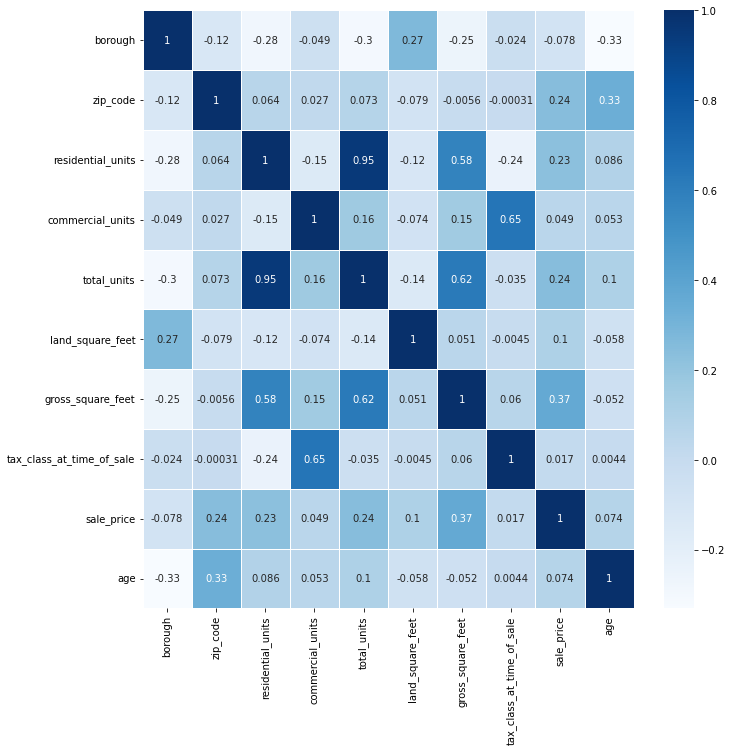

In [22]:
plt.figure(figsize = (11, 11))
sns.heatmap(prop_df_corr, cmap = 'Blues', annot = True, linewidth = 0.75)
plt.show()

In [23]:
train.corr()['sale_price'].sort_values()

borough                     -0.078148
tax_class_at_time_of_sale    0.016927
commercial_units             0.049103
age                          0.073673
land_square_feet             0.102306
residential_units            0.227498
total_units                  0.243029
zip_code                     0.243589
gross_square_feet            0.365327
sale_price                   1.000000
Name: sale_price, dtype: float64

# Exploration Takeaways

- Total Units, Gross Square Feet, Land Square Feet has positive correlation with sale price. 
- Even age has positive correlation with sale price.
- Even graph matches with correlation.
- We will do statistical tests to check relationship of properties with age.


### Hypothesis
- HO: Age and Sale Price has not linear relation.
- H1: Age and Sale Price has linear relation.

In [24]:
from scipy import stats

alpha = 0.05 
corr, p_value = stats.pearsonr(train.age, train.sale_price)
corr, p_value

if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject null hypothesis')
print(p_value ,  corr)

We reject the null hypothesis.
1.0864740252233008e-16 0.0736725504909234


In [25]:
from scipy import stats

alpha = 0.05 
corr, p_value = stats.spearmanr(train.age, train.sale_price)
corr, p_value

if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject null hypothesis')
print(p_value ,  corr)

We reject the null hypothesis.
2.2392840066243972e-06 0.042053453528066734


- Thus, running both pearsonr and spearmanr  statistical test, we reject null hypothesis that states  'Age and Sale Price has not linear relation.' It means that age and sale price may have corelation.

In [26]:
# Splitting into x / y  and features and target # Needs to be adjusted
X_train = train.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_train = train.sale_price

X_validate = validate.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_validate = validate.sale_price

X_test = test.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_test = test.sale_price

In [27]:
X_train.head(3)

,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,age
38029,1,2000.0,1274.0,1,82
43922,2,2100.0,1782.0,1,67
63196,2,4142.0,2296.0,1,67


### Use SelectKBest Feature Engineering to find features that have strong relationship with sale price.

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

f_feature

['total_units', 'land_square_feet', 'gross_square_feet']

### Use Recursive Feature Engineering to find top 3 features

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(estimator=lm, n_features_to_select=3)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

rfe_feature

['total_units', 'tax_class_at_time_of_sale', 'age']

# Modeling

### Baseline Model

In [30]:
# We have defined baseline function in model.py. We will call that function to get baseline RMSE.

md.baseline(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  287408.63 
Validate/Out-of-Sample:  288189.63
RMSE using Median
Train/In-Sample:  291592.74 
Validate/Out-of-Sample:  292385.23


In [31]:
 # Converting y to DataFrames
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [32]:
# Mean
mean = y_train.sale_price.mean() # Train Mean
y_train['sale_price_pred_mean'] = mean
y_validate['sale_price_pred_mean'] = mean

In [33]:
# Median
median = y_train.sale_price.median() # Train Median
y_train['sale_price_pred_median'] = median
y_validate['sale_price_pred_median'] = median

In [34]:
rmse_train = mean_squared_error(y_train.sale_price, y_train.sale_price_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.sale_price, y_validate.sale_price_pred_mean) ** (1/2)

rmse_train, rmse_validate

(287408.62927564647, 288195.7360210109)

In [35]:
rmse_train = mean_squared_error(y_train.sale_price, y_train.sale_price_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.sale_price, y_validate.sale_price_pred_median) ** (1/2)

rmse_train, rmse_validate

(291592.73918600543, 292684.14323267975)

In [36]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [37]:
# create the metric_df as a blank dataframe
metric_df1 = pd.DataFrame()

In [38]:
# make our first entry into the metric_df with median baseline
metric_df1 = make_metric_df(y_validate.sale_price,
                           y_validate.sale_price_pred_mean,
                           'mean_baseline',
                          metric_df1)


In [39]:
# make our first entry into the metric_df with median baseline
metric_df1 = make_metric_df(y_validate.sale_price,
                           y_validate.sale_price_pred_median,
                           'median_baseline',
                          metric_df1)


In [40]:
metric_df1

,model,RMSE_validate,r^2_validate
0,mean_baseline,288195.736021,0.0
1,median_baseline,292684.143233,0.0


In [41]:
y_train.head()

,sale_price,sale_price_pred_mean,sale_price_pred_median
38029,440000.0,607478.969158,558259.0
43922,587200.0,607478.969158,558259.0
63196,338000.0,607478.969158,558259.0
41776,650000.0,607478.969158,558259.0
25962,50000.0,607478.969158,558259.0


### Ordinary Least Square(OLS)

In [43]:
# linear_regression(X_train, y_train, X_validate, y_validate) function is defined in model.py

In [44]:
md.linear_regression(X_train, y_train, X_validate, y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  264893.44 
Validation/Out-of-Sample:  269698.83


In [45]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lm,
               'OLS',
               metric_df1)

In [46]:
metric_df1

,model,RMSE_validate,r^2_validate
0,mean_baseline,288195.736021,0.000000
1,median_baseline,292684.143233,0.000000
2,OLS,269698.828335,0.124212


### LASSO + LARS

In [47]:
# lasso_lars functions has been defined in model_new.py

###### alpha = 0

In [48]:
md.lasso_lars(X_train, y_train, X_validate, y_validate, 0)

RMSE for Lasso + Lars
Training/In-Sample:  264893.44 
Validation/Out-of-Sample:  269698.83


In [49]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lars,
               'lasso_alpha_0',
               metric_df1)

###### alpha 0.01

In [50]:
md.lasso_lars(X_train, y_train, X_validate, y_validate, 0.01)

RMSE for Lasso + Lars
Training/In-Sample:  264893.44 
Validation/Out-of-Sample:  269698.77


In [51]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lars,
               'lasso_alpha_0.01',
               metric_df1)

###### alpha = 0.001

In [52]:
md.lasso_lars(X_train, y_train, X_validate, y_validate, 0.001)

RMSE for Lasso + Lars
Training/In-Sample:  264893.44 
Validation/Out-of-Sample:  269698.82


In [53]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lars,
               'lasso_alpha_0.001',
               metric_df1)

###### alpha = 0.5

In [54]:
md.lasso_lars(X_train, y_train, X_validate, y_validate, 0.5)

RMSE for Lasso + Lars
Training/In-Sample:  264893.47 
Validation/Out-of-Sample:  269696.05


In [55]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lars,
               'lasso_alpha_0.5',
               metric_df1)


###### alpha = 1

In [56]:
md.lasso_lars(X_train, y_train, X_validate, y_validate, 1)

RMSE for Lasso + Lars
Training/In-Sample:  264893.55 
Validation/Out-of-Sample:  269693.32


In [57]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lars,
               'lasso_alpha_1',
               metric_df1)

###### alpha = 2

In [58]:
md.lasso_lars(X_train, y_train, X_validate, y_validate, 2)

RMSE for Lasso + Lars
Training/In-Sample:  264893.87 
Validation/Out-of-Sample:  269688.01


In [59]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lars,
               'lasso_alpha_2',
               metric_df1)

In [60]:
metric_df1

,model,RMSE_validate,r^2_validate
0,mean_baseline,288195.736021,0.000000
1,median_baseline,292684.143233,0.000000
2,OLS,269698.828335,0.124212
3,lasso_alpha_0,269698.828335,0.124212
4,lasso_alpha_0.01,269698.772184,0.124213
5,lasso_alpha_0.001,269698.822719,0.124212
6,lasso_alpha_0.5,269696.046160,0.124230
7,lasso_alpha_1,269693.315742,0.124248
8,lasso_alpha_2,269688.010180,0.124283


### TweedieRegressor (GLM)

In [61]:
# Tweedie_regressor function is defined in model_new.py

###### power = 0, alpha = 0

In [62]:
md.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 0, 0)

RMSE for GLM using Tweedie, power= 0  & alpha= 0 
Training/In-Sample:  264893.44 
Validation/Out-of-Sample:  269698.83


In [63]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_glm,
               'glm_tweedie_0_0',
               metric_df1)

###### power = 1, alpha = 0

In [64]:
md.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 1, 0)

RMSE for GLM using Tweedie, power= 1  & alpha= 0 
Training/In-Sample:  287408.63 
Validation/Out-of-Sample:  288195.74


In [65]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_glm,
               'glm_tweedie_1_0',
               metric_df1)

###### power = 2, alpha = 0

In [66]:
md.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 2, 0)

RMSE for GLM using Tweedie, power= 2  & alpha= 0 
Training/In-Sample:  287408.63 
Validation/Out-of-Sample:  288195.74


In [67]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_glm,
               'glm_tweedie_2_0',
               metric_df1)

###### power = 3, alpha = 0

In [68]:
md.Tweedie_regressor(X_train, y_train, X_validate, y_validate, 3, 0)

RMSE for GLM using Tweedie, power= 3  & alpha= 0 
Training/In-Sample:  287408.63 
Validation/Out-of-Sample:  288195.74


In [69]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_glm,
               'glm_tweedie_3_0',
               metric_df1)

In [70]:
metric_df1

,model,RMSE_validate,r^2_validate
0,mean_baseline,288195.736021,0.000000
1,median_baseline,292684.143233,0.000000
2,OLS,269698.828335,0.124212
3,lasso_alpha_0,269698.828335,0.124212
4,lasso_alpha_0.01,269698.772184,0.124213
5,lasso_alpha_0.001,269698.822719,0.124212
6,lasso_alpha_0.5,269696.046160,0.124230
7,lasso_alpha_1,269693.315742,0.124248
8,lasso_alpha_2,269688.010180,0.124283
9,glm_tweedie_0_0,269698.827795,0.124212


### Polynomial

In [71]:
# polynomial_regression(X_train, y_train, X_validate, y_validate, degree) function defined in model.py

###### degree = 2

In [72]:
md.polynomial_regression(X_train, y_train, X_validate, y_validate, 2)

RMSE for Polynomial Model, degrees= 2 
Training/In-Sample:  261102.96207412274 
Validation/Out-of-Sample:  265159.40156154596


In [73]:
metric_df1 = make_metric_df(y_validate.sale_price,
               y_validate.sale_price_pred_lm2,
               'polynomial_degree_2',
               metric_df1)

###### degree = 3

In [74]:
md.polynomial_regression(X_train, y_train, X_validate, y_validate, 3)

RMSE for Polynomial Model, degrees= 3 
Training/In-Sample:  259680.3127860603 
Validation/Out-of-Sample:  264970.03367130016


In [75]:
# Since RMSE validate is too large we will not incude it to compare
# metric_df1 = make_metric_df(y_validate.sale_price,
#               y_validate.sale_price_pred_lm2,
#              'polynomial_degree_3',
#              metric_df1)
               

###### degree = 4

In [76]:
md.polynomial_regression(X_train, y_train, X_validate, y_validate, 4)

RMSE for Polynomial Model, degrees= 4 
Training/In-Sample:  258337.41731304428 
Validation/Out-of-Sample:  265832.293276962


In [77]:
# Since RMSE validate is too large we will not incude it to compare
# metric_df1 = make_metric_df(y_validate.sale_price,
#             y_validate.sale_price_pred_lm2,
#              'polynomial_degree_4',
#              metric_df1)

# Modeling Takeways

- Best Features were total_units, land_square_feet, and gross_square_feet.
- Best Model was polynomial with degree 2
- For baseline model, we choose to go with mean as its value of RMSE is less than that of median
- Most of the model predict with better RMSE than baseline accuracy depending upon the value of its parameter.
- Some of the model gives less RMSE for train dataset but gives high RMSE for the validation dataset.
- More we clean the data, we will get less RMSE value.

# Evaluate

In [78]:
metric_df1.sort_values('RMSE_validate')

,model,RMSE_validate,r^2_validate
13,polynomial_degree_2,265159.401562,0.153441
8,lasso_alpha_2,269688.010180,0.124283
7,lasso_alpha_1,269693.315742,0.124248
6,lasso_alpha_0.5,269696.046160,0.124230
4,lasso_alpha_0.01,269698.772184,0.124213
5,lasso_alpha_0.001,269698.822719,0.124212
9,glm_tweedie_0_0,269698.827795,0.124212
2,OLS,269698.828335,0.124212
3,lasso_alpha_0,269698.828335,0.124212
10,glm_tweedie_1_0,288195.736021,0.000000


###### Upon comparing RMSE value for various models, we found Polynomial with degree two has less RMSE value for both train and validate data set. So We will use this model to check RMSE for our test data set.

### Test

In [79]:
md.polynomial_regression_test(X_train, y_train, X_validate, y_validate, X_test, y_test, 2)

RMSE for Polynomial Model, degrees=2\Test:  262240 
Validation/Out-of-Sample:  265159.40156154596


### Ploting Sale Price of Properties vs Predicted Sale Price of House for validate dataset

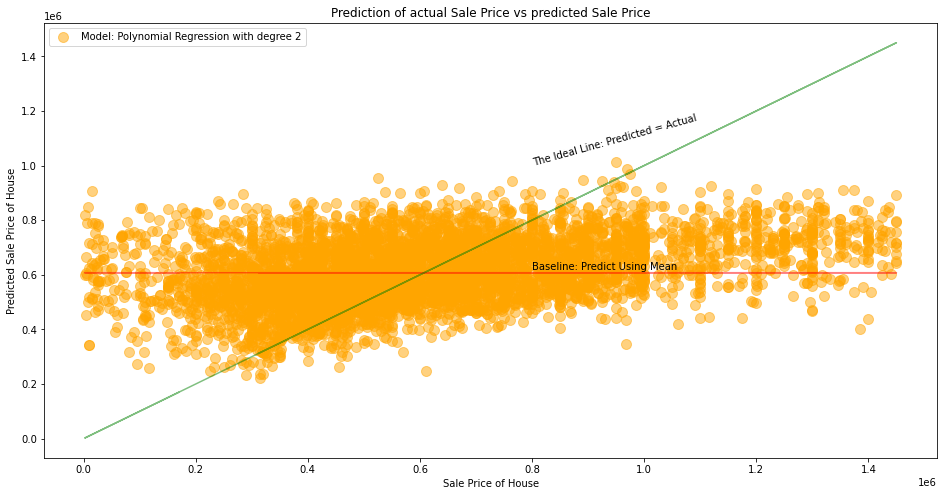

In [80]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.sale_price, y_validate.sale_price_pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (800000, 620000))
plt.plot(y_validate.sale_price, y_validate.sale_price, alpha=.5, color="green", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (800000, 1000000), rotation=15.5)

plt.scatter(y_validate.sale_price, y_validate.sale_price_pred_lm2, 
            alpha=.5, color="orange", s=100, label="Model: Polynomial Regression with degree 2")
plt.legend()
plt.xlabel("Sale Price of House")
plt.ylabel("Predicted Sale Price of House")
plt.title("Prediction of actual Sale Price vs predicted Sale Price")

plt.show()

### Ploting Sale Price of House vs Predicted Sale Price of House for train dataset

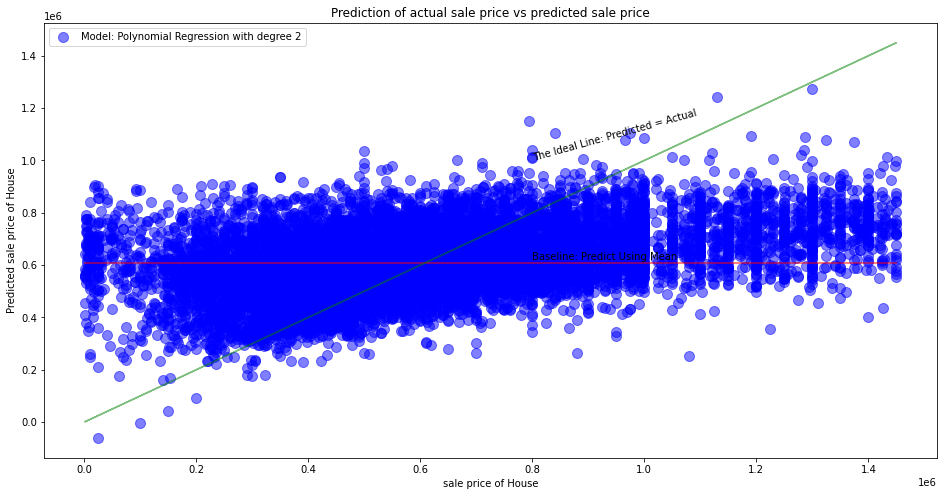

In [81]:
plt.figure(figsize=(16,8))
plt.plot(y_train.sale_price, y_train.sale_price_pred_mean, alpha=.5, color="red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (800000, 620000))
plt.plot(y_train.sale_price, y_train.sale_price, alpha=.5, color="green", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (800000, 1000000), rotation=15.5)

plt.scatter(y_train.sale_price, y_train.sale_price_pred_lm2, 
            alpha=.5, color="blue", s=100, label="Model: Polynomial Regression with degree 2")
plt.legend()
plt.xlabel("sale price of House")
plt.ylabel("Predicted sale price of House")
plt.title("Prediction of actual sale price vs predicted sale price")

plt.show()

In [82]:
prop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22582 entries, 4172 to 84545
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         22582 non-null  int64  
 1   neighborhood                    22582 non-null  object 
 2   tax_class_at_present            22582 non-null  object 
 3   zip_code                        22582 non-null  int64  
 4   residential_units               22582 non-null  int64  
 5   commercial_units                22582 non-null  int64  
 6   total_units                     22582 non-null  int64  
 7   land_square_feet                22582 non-null  float64
 8   gross_square_feet               22582 non-null  float64
 9   tax_class_at_time_of_sale       22582 non-null  int64  
 10  building_class_at_time_of_sale  22582 non-null  object 
 11  sale_price                      22582 non-null  float64
 12  sale_date                    

### Conclusion:
We constructed OLS model, LASSO + LARS model, Tweedie Regression Model, Polynomial Regression model from help of sklearn library to check RMSE values of our cleaned data.

Total Units, Land Square Feet, and Gross Square Feet are positive key drivers for the sale price of the properties.
Feature Engineered attribute or I would say modified attritute 'age' was also positive key drivers for the sale price of the single family resiedential properties.

After modeling the New York Properties data using five features (Age, Total Units, Land Square Feet, and Gross Square Feet ), the Polynomial Model with degree 2 produced the best results with RMSE values of 261103, 265159 and 262240 for train, validate and test dataset. 

It is improvement by 9.40% over the baseline model (when comparing training data set). It was improved by 8.00 % for validate datadet. Therefore, these models do show that they could be used to produce a prediction for properties values; however, the error is still high at over $262240 RSME. I would recommed further cleaning data for a reliable predictor for sale price in order to use this model.
If I have more time, I would clean the dataset for best result possible to reduce RMSE value for my models.

##### Recommendation
There are lots of missing data, that I have dropped instead of imputing them. I will request with Database Administrator to set up various rules to gather other attributes of the properties. When some important attributes are missing, have end users to resubmit the entry so that we can collect data without missing any fields.

# Next Steps

Impute the missing data with some values that makes more sense based on its attibutes. Try to clean data to get the model that will make predictions with less RMSE values. Try to to time series analysis of data by collecting data for more than 24 months. 